https://www.kaggle.com/c/aerial-cactus-identification

first try on this dataset with new for me fast.ai lib, 98% acc 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai import *
from fastai.vision import *

In [8]:
data = ImageDataBunch.from_csv(path="data", folder="train", size=32, ds_tfms=get_transforms()).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (14000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
1,1,1,1,1
Path: data;

Valid: LabelList (3500 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
1,0,0,1,1
Path: data;

Test: None

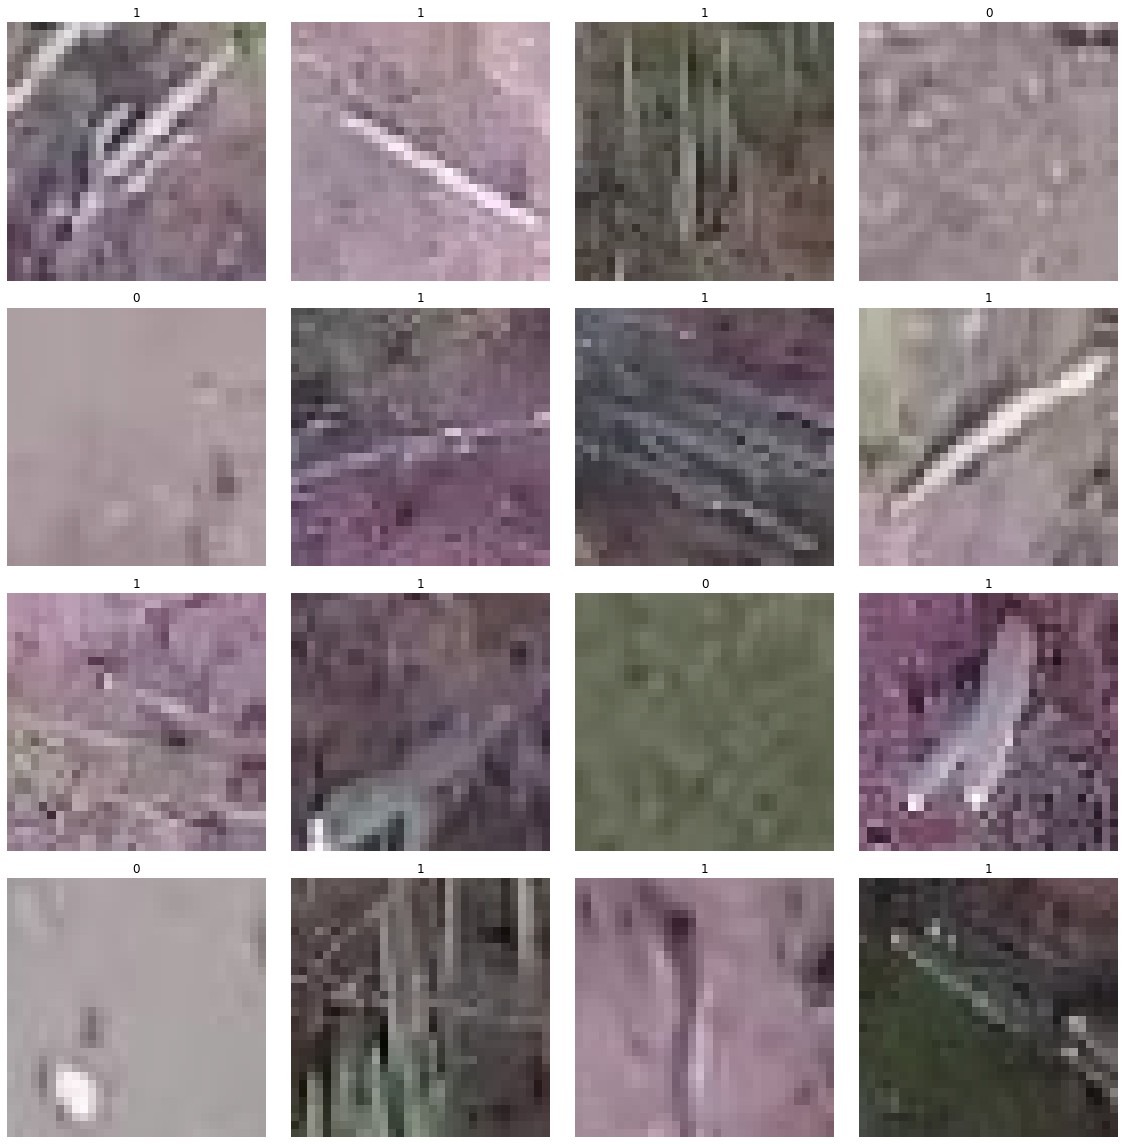

In [6]:
data.show_batch(rows=4, fig=(7,6))

In [7]:
print(data.classes)

[0, 1]


In [9]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [10]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.411612,0.223154,0.078857,00:14
1,0.226303,0.135542,0.052286,00:13
2,0.171270,0.109087,0.042571,00:12
3,0.125549,0.075562,0.032000,00:15
4,0.104559,0.062417,0.024000,00:12
5,0.103972,0.066270,0.026286,00:13


In [11]:
learn.save("stage-1")

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

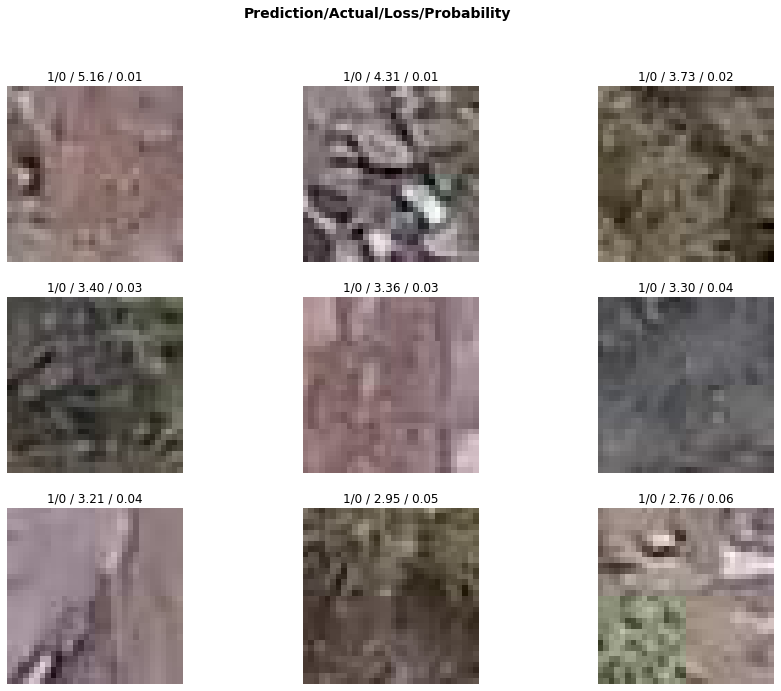

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

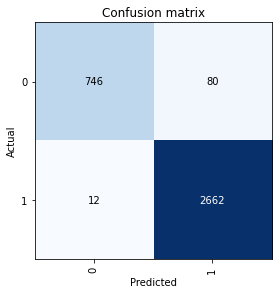

In [15]:
interp.plot_confusion_matrix()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


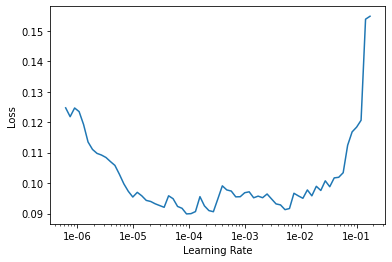

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.089168,0.048415,0.017714,00:13
1,0.078860,0.049144,0.018571,00:13


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

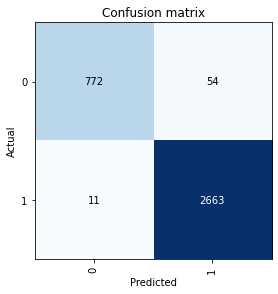

In [22]:
interp.plot_confusion_matrix()